In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_pickle("Unsupervised_Case_Study")
data.head()

,Income,SpendingScore
0,9.933426,-1.552356
1,-0.571099,8.133061
2,0.559529,4.214007
3,8.464500,-2.788114
4,-1.230659,2.848220


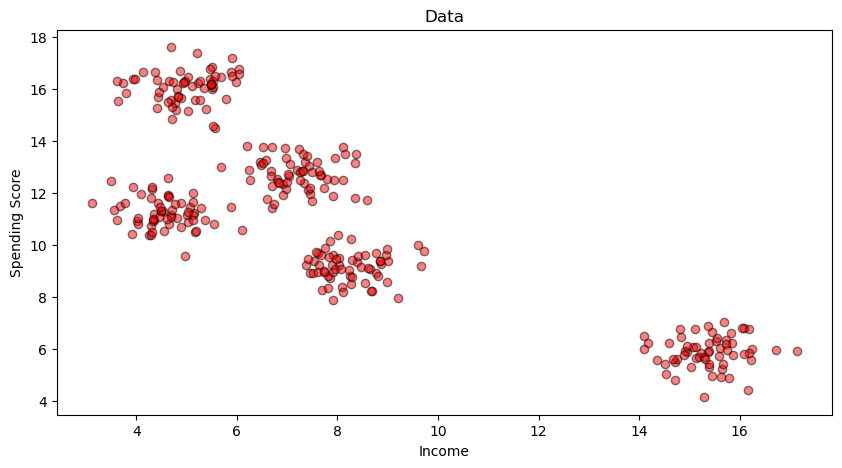

In [8]:
X = data.values

X[:, 0] = np.abs(min(X[:, 0]) * 2) + X[:, 0]
X[:, 1] = np.abs(min(X[:, 1]) * 2) + X[:, 1]

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c='red', marker='o', edgecolor='black', alpha=0.5)
plt.title('Data')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

In [10]:
k_means = KMeans(n_clusters=5)
k_means.fit(X)

clusters = k_means.labels_
cluster_centers = k_means.cluster_centers_

c:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


C:\Users\Monster\AppData\Local\Temp\ipykernel_15852\2723693439.py:4: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', edgecolor='black', s=20)


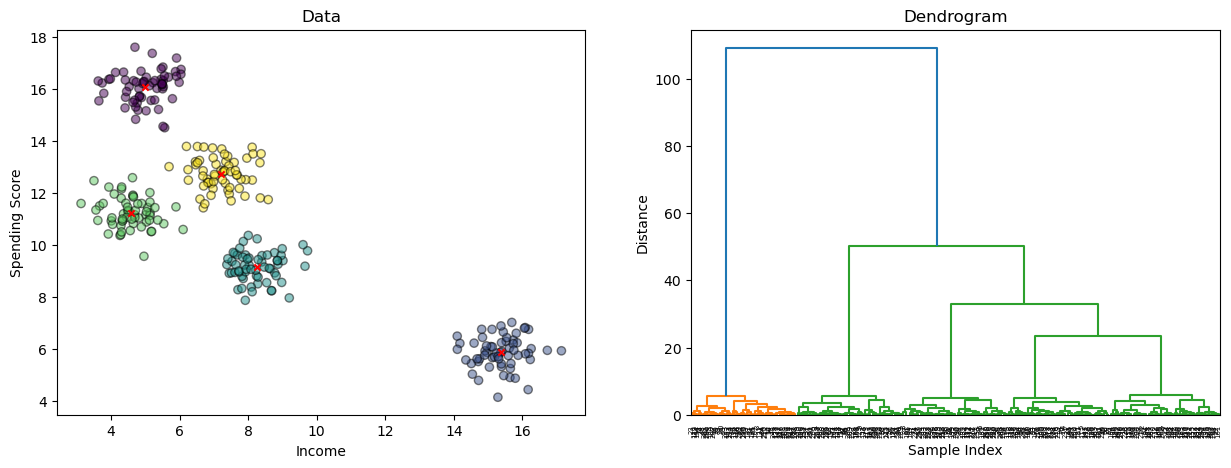

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters, marker='o', edgecolor='black', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', edgecolor='black', s=20)
plt.title('Data')
plt.xlabel('Income')
plt.ylabel('Spending Score')

linkage_matrix = linkage(X, method='ward')
plt.subplot(1, 2, 2)
dendrogram(linkage_matrix, labels=range(len(X)))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()